# Die Schweizer Bevölkerung stimmt ungleicher wie der Bundesrat ab wie früher
## Variablen: br-pos, annahme

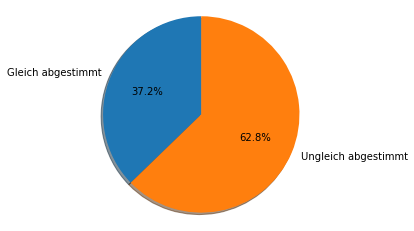

In [2]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt

# Read in the data
data = pd.read_csv('./data/buibid_data_original_utf_8.csv')

# Only keep relevant data
relevant_data = data[['datum','titel_kurz_d', 'br-pos', 'annahme']]
relevant_data.head()

# Clean up data for br-pos we only want 1 = Befürwortet or 2 = Ablehnend
clean_data = relevant_data[(relevant_data['br-pos'] == '1')|(relevant_data['br-pos'] == '2')]
clean_data.head()

equal_percentage = len(clean_data[clean_data['br-pos'] == clean_data['annahme']])
not_equal_percentage = len(clean_data) - equal_percentage


# Draw a pie chart
labels = 'Gleich abgestimmt', 'Ungleich abgestimmt'
sizes = [equal_percentage, not_equal_percentage]
fig1, ax1 = plt.subplots()
ax1.pie(sizes,labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()
